In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: MacOSX


## 梯度下降求解一元二次方程

$$
y = (x-2.5)^2 -1
$$

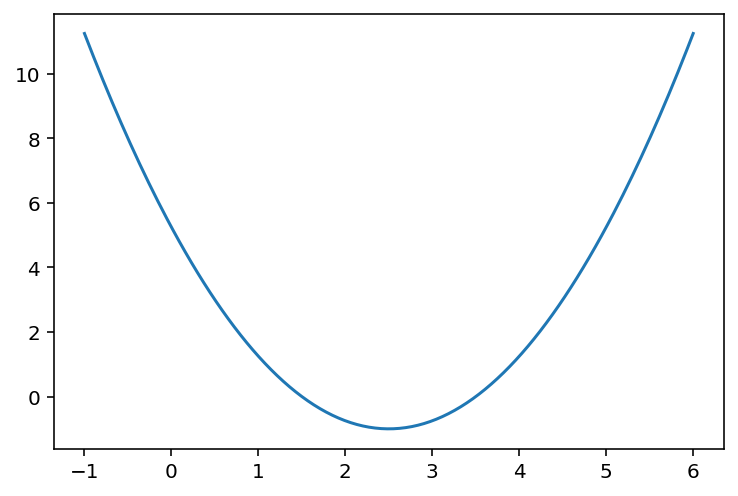

In [2]:
x = np.linspace(-1,6,200)
y = (x - 2.5)**2 - 1

plt.plot(x, y)
plt.show()

In [3]:
def j(theta):
    """一元二次方程"""
    try:
        return (theta - 2.5) ** 2 - 1
    except:
        return float('inf')

def dj(theta):
    """求导"""
    return 2 * (theta - 2.5)

def gradient_descent(theta=0.0, eta=0.01, epsilon=1e-8, max_iters=10000):
    """
    theta: 参数
    eta: 学习率
    epsilon: 最小值
    max_iters: 最大尝试次数
    """
    theta_history = [theta]
    while max_iters>0:
        gradient = dj(theta)
        last_theta = theta
        theta = theta - eta * gradient
        theta_history.append(theta)
        
        if(abs(j(theta)-j(last_theta)) < epsilon):
            break
        max_iters -= 1
    print('theta: ', theta)
    print('min j(theta): ', j(theta))
    print('theta_history length: ', len(theta_history))
    plt.plot(x, y)
    plt.plot(np.array(theta_history), j(np.array(theta_history)), color="r", marker='+')
    plt.show()
    

theta:  2.4995140741236224
min j(theta):  -0.9999997638760426
theta_history length:  424


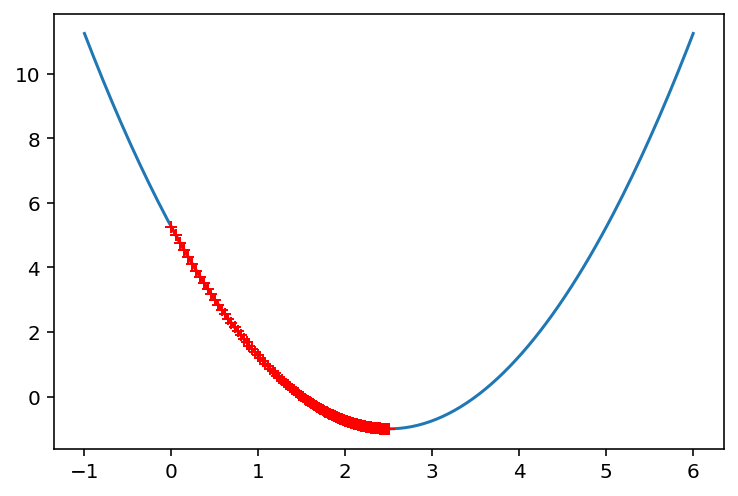

In [4]:
# 使用默认参数
gradient_descent()

theta:  2.4984243400819484
min j(theta):  -0.9999975172958226
theta_history length:  3682


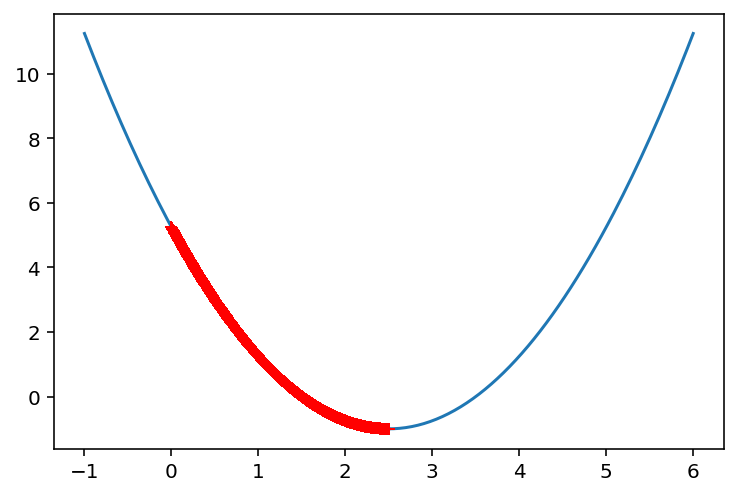

In [5]:
# 当学习率eta比较小时，下降的步子很小。程序需要循环很多次才会找到最小值。 一般学习率会设置为0.01
gradient_descent(eta=0.001)

theta:  2.500054842376601
min j(theta):  -0.9999999969923137
theta_history length:  22


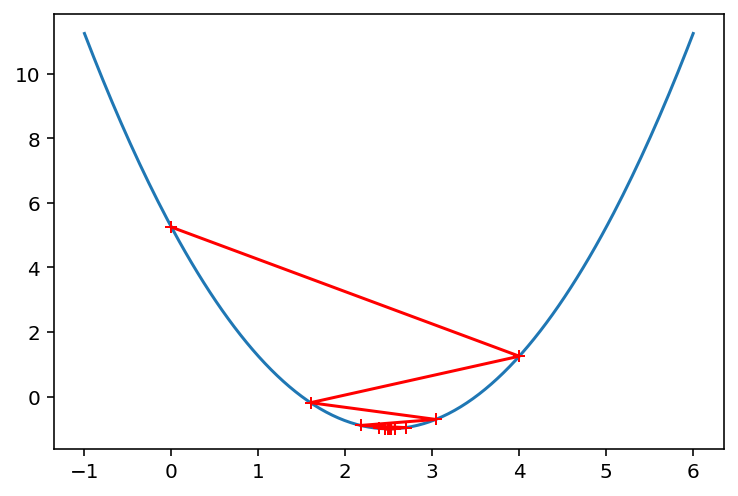

In [6]:
# 当学习率eta较大时候, theta跳到右边
gradient_descent(eta=0.8)

theta:  -8.183476519740352e+150
min j(theta):  6.696928794914166e+301
theta_history length:  501


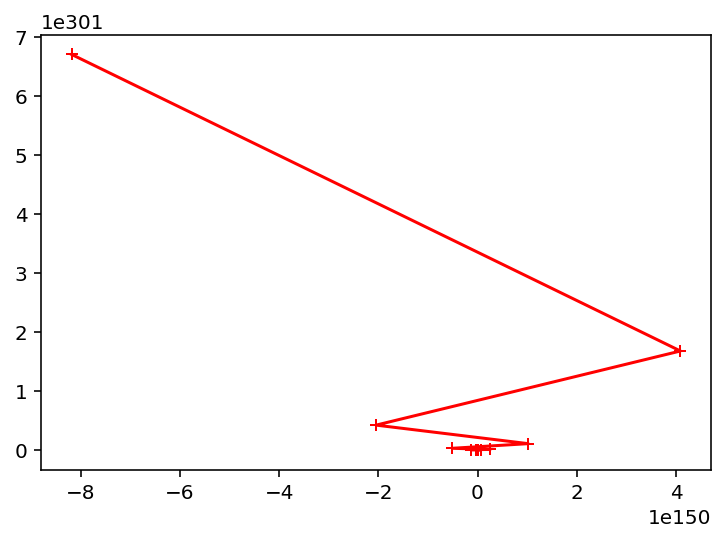

In [7]:
# 当特别大时，如1.5. 程序会陷入死循环, 所以限定递归次数为500
gradient_descent(eta=1.5, max_iters=500)

## 线性回归模型中使用梯度下降

损失函数:

$$
J(\theta) = \frac{1}{m} \sum_{i=1}^{m}\left(y^{(i)}-\hat{y}^{(i)}\right)^{2}
$$

$$
\nabla J(\boldsymbol{\theta})
=
\left(\begin{array}{c}
\partial J / \partial_{\theta_{0}} \\
\partial J / \partial \theta_{1} \\
\partial J / \partial_{\theta_{2}} \\
\cdots \\
\partial J_{\partial \theta_{n}}
\end{array}\right)
=
\frac{2}{m} \cdot\left(\begin{array}{c}
\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \\
\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{1}^{(i)} \\
\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{2}^{(i)} \\
\cdots \\
\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{n}^{(i)}
\end{array}\right.
$$


其中y的预测值:

$$
X_{b}=\left(\begin{array}{ccccc}
1 & X_{1}^{(1)} & X_{2}^{(1)} & \ldots & X_{n}^{(1)} \\
1 & X_{1}^{(2)} & X_{2}^{(2)} & \ldots & X_{n}^{(2)} \\
\ldots & & & & \ldots \\
1 & X_{1}^{(m)} & X_{2}^{(m)} & \ldots & X_{n}^{(m)}
\end{array}\right) \quad \theta=\left(\begin{array}{c}
\theta_{0} \\
\theta_{1} \\
\theta_{2} \\
\ldots \\
\theta_{n}
\end{array}\right)
$$

$$
\hat{y}=X_{b} \cdot \theta
$$



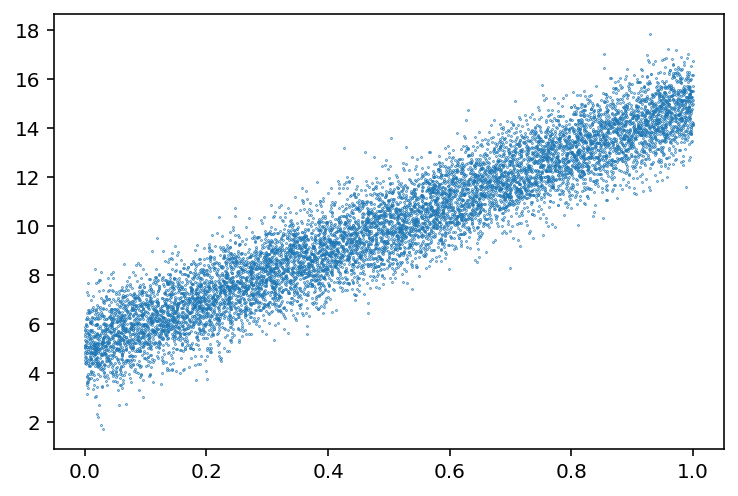

In [49]:
num_size = 10000
np.random.seed(100)
# 1. np.random.random(size=num_size) 0-1的随机数； 2. np.random.normal(size=num_size) 正态分布
x_1 = np.random.random(size=num_size)
X_1 = x_1.reshape(-1,1)
# 函数 y=10x+5 然后设置一定的噪音
y_1 = 10 * x_1 + 5 + np.random.normal(size=num_size) 

plt.scatter(x_1, y_1, s=0.1)
plt.show()

### 循环方式实现


In [90]:
class LinearRegression:
    def __init__(self):
        self._thetas = None
        # 截距
        self.intercept = None
        # 参数系数
        self.coefs = None

    def fit(self, x_train, y_train):
        raise NotImplementedError

    def predict(self, x_predict):
        raise NotImplementedError

    @staticmethod
    def score(y, y_predict):
        """R评价"""
        return 1 - np.dot(y_predict - y, y_predict - y) / len(y) / np.var(y)
    
class LinearRegressionBGDLoop(LinearRegression):
    """ 批量梯度下降(BGD)_循环维度 """
    def j(self, x, y, theta):
        """目标函数"""
        try:
            return np.sum(y - np.dot(x, theta)) ** 2 / len(x)
        except:
            # 当数据特别大，报错时，返回无穷大。
            return float('inf')

    def dj(self, x, y, thetas):
        """求导(梯度)"""
        res = np.empty(len(thetas))
        # 第0个theta,其实就是截距
        res[0] = np.sum(np.dot(x, thetas) - y)
        for col in range(1, len(thetas)):
            res[col] = np.sum((np.dot(x, thetas) - y).dot(x[:, col]))

        return res * 2 / len(x)

    def gradient_descent(self, x, y, initial_thetas, eta, epsilon, max_iters):
        """梯度下降"""
        thetas = initial_thetas
        while max_iters > 0:
            # 梯度gradient
            gradient = self.dj(x, y, thetas)
            last_thetas = thetas
            thetas = thetas - eta * gradient
            if(abs(self.j(x, y, thetas) - self.j(x, y, last_thetas)) < epsilon):
                break
            max_iters -= 1

        self._thetas = thetas
        self.intercept = thetas[0]
        self.coefs = thetas[1:]

    def fit(self, x_train, y_train, eta=0.01, epsilon=1e-8, max_iters=1e4):
        """训练"""
        # 加上一列全为1
        X_b = np.hstack([np.ones((len(x_train), 1)), x_train])
        initial_thetas = np.zeros(X_b.shape[1])
        self.gradient_descent(X_b, y_train, initial_thetas, eta, epsilon, max_iters)

    def predict(self, x_predict):
        """预测"""
        X_b = np.hstack([np.ones((len(x_predict), 1)), x_predict])
        return np.dot(X_b, self._thetas)

    @staticmethod
    def score(y, y_predict):
        """R评价"""
        return 1 - np.dot(y_predict - y, y_predict - y) / len(y) / np.var(y)


In [58]:
# 主函数    
linear = LinearRegressionBGDLoop()
%time linear.fit(X_1, y_1)
%time predict_y_1 = linear.predict(X_1)
print('coefs: ', linear.coefs)
print('intercept: ', linear.intercept)
print('score: ', linear.score(y_1, predict_y_1))


CPU times: user 2.03 s, sys: 186 ms, total: 2.22 s
Wall time: 1.35 s
CPU times: user 874 µs, sys: 334 µs, total: 1.21 ms
Wall time: 643 µs
coefs:  [9.95834636]
intercept:  5.030511016464405
score:  0.8927947969714475


### 向量化计算

$$
\nabla J(\boldsymbol{\theta}) 
=\frac{2}{m} \cdot\left(\begin{array}{c}
\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{0}^{(i)} \\
\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{1}^{(i)} \\
\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{2}^{(i)} \\
\cdots \\
\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{n}^{(i)}
\end{array}\right.
=\frac{2}{m} \cdot\left(X_{b} \theta-y\right)^{T} \cdot X_{b}
=\frac{2}{m} \cdot X_{b}^{T} \cdot\left(X_{b} \theta-y\right)
$$


In [96]:
class LinearRegressionBGDVector(LinearRegressionBGDLoop):
    """批量梯度下降(BGD)_向量化维度"""
    def dj(self, x, y, thetas):
        """向量实现"""
        return (x.T).dot(x.dot(thetas)-y) * 2 / len(x)

In [65]:
# 主函数    
lin_reg = LinearRegressionBGDVector()
%time lin_reg.fit(X_1, y_1)
%time predict_y = lin_reg.predict(X_1)
print('coefs: ', lin_reg.coefs)
print('intercept: ', lin_reg.intercept)
print('score: ', lin_reg.score(y_1, predict_y_1))


CPU times: user 1.22 s, sys: 104 ms, total: 1.32 s
Wall time: 738 ms
CPU times: user 602 µs, sys: 182 µs, total: 784 µs
Wall time: 426 µs
coefs:  [9.95834636]
intercept:  5.030511016464405
score:  0.8927947969714475


循环实现与向量实现值一样，向量会快一点，但不是很明显，是因为这里coefs只有一个，没有区分点。创建以下特征数为m,样本为n的样本集. 效果就很明显。

In [83]:
# 创建样本集: 特征数为m,样本为n
m = 100
n = 10000

x_m = np.random.normal(size=(n, m))
true_thetas = np.random.uniform(0.0, 100.0, size=m+1)
y_m = x_m.dot(true_thetas[1:]) + true_thetas[0] + np.random.normal(0., 10., size=n)

In [97]:
lin_reg1 = LinearRegressionBGDLoop()
%time lin_reg1.fit(x_m, y_m)

lin_reg2 = LinearRegressionBGDVector()
%time lin_reg2.fit(x_m, y_m)

CPU times: user 1min 8s, sys: 2.25 s, total: 1min 11s
Wall time: 42.2 s
CPU times: user 2.92 s, sys: 84.9 ms, total: 3 s
Wall time: 2.22 s


## 梯度下降法大家族

- 批量梯度下降法: Batch Gradient Descent(BGD)
- 随机梯度下降法: Stochastic Gradient Descen(SGD)
- 小批量梯度下降法: Mini-batch Gradient Descent(MBGD) 融合了BGD与SGD

### 批量梯度下降法
以上实现的就是批量梯度下降法，求每次theta梯度都需要全量计算一下样本

$$
\nabla J(\boldsymbol{\theta}) 
=\frac{2}{m} \cdot\left(\begin{array}{c}
\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{0}^{(i)} \\
\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{1}^{(i)} \\
\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{2}^{(i)} \\
\cdots \\
\sum_{i=1}^{m}\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{n}^{(i)}
\end{array}\right.
=\frac{2}{m} \cdot\left(X_{b} \theta-y\right)^{T} \cdot X_{b}
=\frac{2}{m} \cdot X_{b}^{T} \cdot\left(X_{b} \theta-y\right)
$$


### 随机梯度下降法
每次只随机选取一个样本计算theta梯度

$$
\nabla J(\boldsymbol{\theta}) 
=2 \cdot\left(\begin{array}{c}
\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{0}^{(i)} \\
\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{1}^{(i)} \\
\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{2}^{(i)} \\
\cdots \\
\left(X_{b}^{(i)} \theta-y^{(i)}\right) \cdot X_{n}^{(i)}
\end{array}\right)=2 \cdot\left(X_{b}^{(i)}\right)^{T} \cdot\left(X_{b}^{(i)} \theta-y^{(i)}\right)
$$

学习率逐渐变小(经验值 a=5,b=50)。这是个典型的模拟退火思想

$$
\eta=\frac{t_{0}}{i_{-} \text {iters }+t_{1}}
$$


In [93]:
class LinearRegressionSGD(LinearRegressionBGDLoop):
    """随机梯度下降(SDG)"""
    def dj(self, x_i, y_i, thetas):
        return (x_i.T).dot(x_i.dot(thetas)-y_i) * 2

    def gradient_descent(self, x, y, initial_thetas, eta, epsilon, max_iters, t0, t1):
        """梯度下降"""
        thetas = initial_thetas
        while max_iters > 0:
            # 随机抽取一个样本
            i = np.random.randint(len(x))
            # 梯度gradient
            gradient = self.dj(x[i], y[i], thetas)
            last_thetas = thetas
            # 学习率模拟退火
            eta = (t0 + eta) / (max_iters + t1)
            thetas = thetas - eta * gradient
            if(abs(self.j(x, y, thetas) - self.j(x, y, last_thetas)) < epsilon):
                break
            max_iters -= 1

        self._thetas = thetas
        self.intercept = thetas[0]
        self.coefs = thetas[1:]

    def fit(self, x_train, y_train, eta=0.01, epsilon=1e-8, max_iters=1e4, t0=5, t1=50):
        """训练"""
        # 加上一列全为1
        X_b = np.hstack([np.ones((len(x_train), 1)), x_train])
        initial_thetas = np.zeros(X_b.shape[1])
        self.gradient_descent(X_b, y_train, initial_thetas, eta, epsilon, max_iters, t0, t1)

In [64]:
# 主函数    
lin_reg = LinearRegressionSGD()
%time lin_reg.fit(X_1, y_1)
%time predict_y = lin_reg.predict(X_1)
print('---- SGD ----')
print('coefs: ', lin_reg.coefs)
print('intercept: ', lin_reg.intercept)
print('score: ', lin_reg.score(y_1, predict_y_1))

CPU times: user 1.99 s, sys: 175 ms, total: 2.17 s
Wall time: 1.49 s
CPU times: user 559 µs, sys: 215 µs, total: 774 µs
Wall time: 997 µs
---- Vector ----
coefs:  [9.90608818]
intercept:  4.81501911723699
score:  0.8927947969714475


### 小批量梯度下降法
TODO: 待补充

### BGD、SGD、MBGD比较

In [108]:
print('----- BGD ----- ')
lin_reg1 = LinearRegressionBGDLoop()
%time lin_reg1.fit(x_m, y_m)
%time predict_y_m1 = lin_reg1.predict(x_m)
lin_reg1.score(y_m, predict_y_m1) 
print('score: ', lin_reg1.score(y_m, predict_y_m1))
      
print('----- SGD ----- ')
lin_reg2 = LinearRegressionSGD()
%time lin_reg2.fit(x_m, y_m)
predict_y_m2 = lin_reg2.predict(x_m)
print('score: ', lin_reg2.score(y_m, predict_y_m2))

----- BGD ----- 
CPU times: user 1min 13s, sys: 2.64 s, total: 1min 15s
Wall time: 48.4 s
CPU times: user 4.07 ms, sys: 934 µs, total: 5 ms
Wall time: 2.38 ms
score:  0.9996949647594553
----- SGD ----- 
CPU times: user 12.9 s, sys: 379 ms, total: 13.3 s
Wall time: 7.37 s
score:  -1.0385235598722087e+28


## 线性回归 梯度下降 vs 正规方程解
- 正规方程解时间复杂度较大，不如梯度下降。
- 正规方程不需要进行数据标准话，而梯度下降需要。

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

# 正规方程求解
print('---- LinearRegression ----')
lin_reg = LinearRegression() 
%time lin_reg.fit(x_m, y_m)
%time y_predict = lin_reg.predict(x)
print('score', lin_reg.score(x, y_predict))

# 梯度下降求解
print('/n---- SGDRegressor ----')
lin_reg = SGDRegressor(learning_rate="constant") 
%time lin_reg.fit(x_m, y_m)
%time y_predict_m = lin_reg.predict(x_m)
print('score', lin_reg.score(x_m, y_predict_m))


---- LinearRegression ----
CPU times: user 995 ms, sys: 70.5 ms, total: 1.07 s
Wall time: 689 ms
CPU times: user 115 ms, sys: 111 ms, total: 225 ms
Wall time: 253 ms
score 1.0
/n---- SGDRegressor ----
CPU times: user 715 ms, sys: 14.6 ms, total: 729 ms
Wall time: 627 ms
CPU times: user 12.1 ms, sys: 207 µs, total: 12.3 ms
Wall time: 8.79 ms
score 1.0


## 调试梯度
用这个朴实的梯度调试方法，求得梯度，带入目标函数中求得想要的thetas(但这个时间复杂度高，只适合小批量debug使用). 用来验证推导的梯度求解公式.

**对于一元**

$\frac{d J}{d \theta}=\frac{J(\theta+\varepsilon)-J(\theta-\varepsilon)}{12 \varepsilon}$

**对于多元**

$$
\theta=\left(\theta_{0}, \theta_{1}, \theta_{2}, \ldots, \theta_{n}\right) \\
\theta_{0}^{+}=\left(\theta_{0}+\varepsilon, \theta_{1}, \theta_{2}, \ldots, \theta_{n}\right) \\
\theta_{0}^{-}=\left(\theta_{0}-\varepsilon, \theta_{1}, \theta_{2}, \ldots, \theta_{n}\right) \\
\frac{\partial J}{\partial \theta}=\left(\frac{\partial J}{\partial \theta_{0}}, \frac{\partial J}{\partial \theta_{1}}, \frac{\partial J}{\partial \theta_{2}}, \ldots, \frac{\partial J}{\partial \theta_{n}}\right)
$$

推导出 => 

$$
\frac{\partial J}{\partial \theta_{0}}=\frac{J\left(\theta_{0}^{+}\right)-J\left(\theta_{0}^{-}\right)}{2 \varepsilon}
$$

## 参考

- [Python3入门机器学习](https://github.com/liuyubobobo/Play-with-Machine-Learning-Algorithms)
- [sklearn - 线性回归(正规方程与梯度下降)
](https://www.jianshu.com/p/1ebeb31c312a)